<h1 align='center'> 영상처리 프로그래밍 실습 3</h1>

<h6 align='right'> 2022. 3. 24. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 김성문   &nbsp;&nbsp;          학번: 20175115    &nbsp;&nbsp;         학과(전공): 빅데이터전공
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 3월 30일 (수) 오후 6:00까지 최종본을 SmartLEAD제출


In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


## 예제 1. 영상의 반전

###  8-비트 양자화 흑백 영상의 반전

한 화소가 8-비트로 양자화된 2차원 흑백 영상 $f(x,y)$의 반전 영상 $g(x,y)$는 다음과 같이 표현된다.

$$g(x,y) = 255 - f(x,y)$$

'tree-1.jpg' 파일을 읽고, 흑백 영상으로 변환한 후에 흑백영상과 이 흑백영상의 반전 영상을 화면에 나란히 표시하는 프로그램을 작성하라.

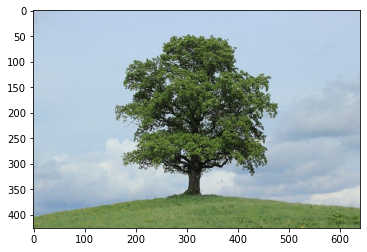

In [2]:
img = mpimg.imread('tree-1.jpg')
plt.imshow(img)
plt.show()

In [3]:
img = cv2.imread('tree-1.jpg')

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
img.shape, img_gray.shape

((426, 640, 3), (426, 640))

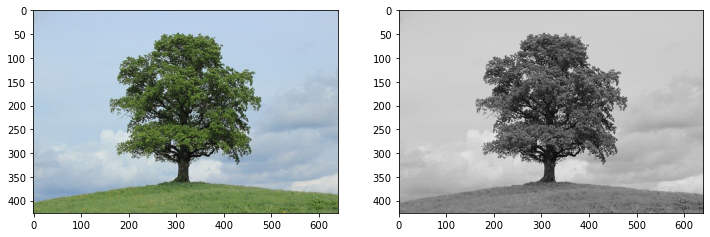

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(121)  # row1, column2, 1번째
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(img_gray, cmap='gray')  # 흑백사진은 cmap옵션 필수

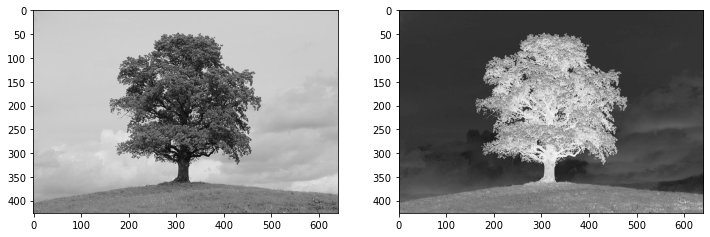

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(121)  # row1, column2, 1번째
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(255-img_gray, cmap='gray')  # 영상 반전, broadcasting 이용

### 컬러 영상의 반전

'tree-1.jpg' 파일을 읽고, 이 영상과 이 영상의 반전 영상을 화면에 나란히 표시하는 프로그램을 작성하라.


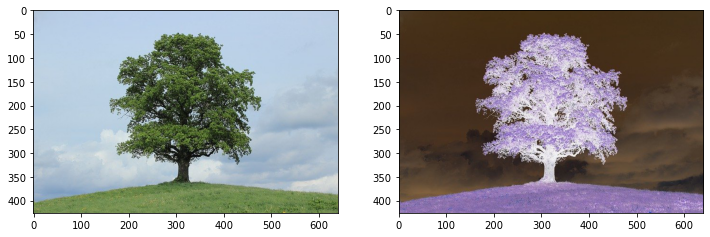

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(121)  # row1, column2, 1번째
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(255-img[:,:,::-1])  # 영상 반전, broadcasting 이용

## 예제 2. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭하면 흑백 영상을 표시하고, 오른쪽 마우스를 누르면 컬러 영상을 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [9]:
def onMouseColorGray(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        cv2.imshow(winName, img_gray)    # 읽기만 할 때는 글로벌 선언 필요 X
    
    elif event == cv2.EVENT_RBUTTONUP:
        cv2.imshow(winName, img)

# main body
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGray)

while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()

In [30]:
cv2dir = dir(cv2)   # list
[e for e in cv2dir if 'EVENT' in e]

# for e in cv2dir:
#     if 'EVENT' in e:
#         print(e)

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

## 예제 3. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭하면 흑백반전 영상을 표시하고, 오른쪽 마우스를 누르면 원 영상을 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [10]:
def onMouseColorGray1(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        cv2.imshow(winName, 255-img_gray)    # 읽기만 할 때는 글로벌 선언 필요 X
    
    elif event == cv2.EVENT_RBUTTONUP:
        cv2.imshow(winName, img)

# main body
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGray1)

while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()

## 예제 4. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭할 때마다 흑백 영상과 흑백 반전 영상을 번갈아 가면서 표시하고, 오른쪽 마우스 버튼을 클릭할 때마다 컬러 영상과 컬러 반전 영상을 번갈아 가면서 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [11]:
def onMouseColorGrayInvert(event, x, y, flags, param):
    global color_mode, gray_mode        # 계속 갱신을 해주어야하기 때문에 global변수 선언
    if event == cv2.EVENT_LBUTTONUP:
        if gray_mode == 'NORMAL':
            cv2.imshow(winName, img_gray)
            gray_mode = 'INVERT'
        elif gray_mode == 'INVERT':
            cv2.imshow(winName, img_gray_inv)
            gray_mode = 'NORMAL'    
    
    elif event == cv2.EVENT_RBUTTONUP:
        if color_mode == 'NORMAL':
            cv2.imshow(winName, img)
            color_mode = 'INVERT'
        elif color_mode == 'INVERT':
            cv2.imshow(winName, img_inv)
            color_mode = 'NORMAL'    

# main body
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_inv = 255-img
img_gray_inv = 255-img_gray

color_mode = 'NORMAL'
gray_mode = 'NORMAL'

winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGrayInvert)

while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()

## Global 변수 대신 parameter 사용하기

In [35]:
def onMouseColorGrayInvert(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        if param[0] == 'NORMAL':
            cv2.imshow(winName, img_gray)
            param[0] = 'INVERT'
        elif param[0] == 'INVERT':
            cv2.imshow(winName, img_gray_inv)
            param[0] = 'NORMAL'    
    
    elif event == cv2.EVENT_RBUTTONUP:
        if param[1] == 'NORMAL':
            cv2.imshow(winName, img)
            param[1] = 'INVERT'
        elif param[1] == 'INVERT':
            cv2.imshow(winName, img_inv)
            param[1] = 'NORMAL'    

# main body
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_inv = 255-img
img_gray_inv = 255-img_gray

mode = ['NORMAL', 'NORMAL']   # list는 mutable 객체

winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGrayInvert, param=mode)   # mutable은 바뀐 값을 객체에 할당된 메모리에 전달

while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()

## Weighted sum of two images

$$g(x,y) = \alpha f_1(x,y) + (1-\alpha )f_2(x,y), \;\; 0 \le \alpha \le 1$$

## 예제 5: 지난 주 문제 1.

가중치 $\alpha$를 1부터 0까지 0.01 간격으로 변경해 가면서, 4 영상의 weighted sum을 구하고 화면에 표시하는 프로그램을 작성하라.

영상의 순서는 tree-1 --> tree-2 --> tree-3 --> tree-4 --> tree-1

단, 영상과 영상 사이의 디스플레이 간격은 0.5초로 설정하라.


In [12]:
img_tree1 = mpimg.imread('tree-1.jpg')[:,:,::-1]
img_tree2 = mpimg.imread('tree-2.jpg')[:,:,::-1]
img_tree3 = mpimg.imread('tree-3.jpg')[:,:,::-1]
img_tree4 = mpimg.imread('tree-4.jpg')[:,:,::-1]

#img = img_tree1.copy()
winname = "Weighted Sum of images"
cv2.imshow(winname, img_tree1)
cv2.waitKey(0)   

images = [img_tree1, img_tree2, img_tree3, img_tree4, img_tree1]
for n in range(len(images)-1):
    for alpha in np.arange(0, 1.0, 0.01):
        img = ((1-alpha)*images[n] + alpha*images[n+1]).astype(np.uint8)
        cv2.imshow(winname, img)
        cv2.waitKey(10)
cv2.destroyAllWindows()

## 예제 6.

OpenCV의 waitKey 함수를 이용하여 예제 5에서 영상이 변화 과정을 반수동으로 변경할 수 있도록 프로그램을 수정하라.

단, 입력한 키에 따른 동작은 다음과 같다.

- '1': $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2
- '2': $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3
- '3': $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4
- '4': $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1
- 'q': 프로그램 종료



In [13]:
def mix_images(n):
    if 0 <= n < 100:
        alpha = n / 100
        img = ((1-alpha)*img_tree1 + alpha*img_tree2).astype(np.uint8)
    elif n < 200:
        alpha = (n - 100) / 100
        img = ((1-alpha)*img_tree2 + alpha*img_tree3).astype(np.uint8)
    elif n < 300:
        alpha = (n - 200) / 100
        img = ((1-alpha)*img_tree3 + alpha*img_tree4).astype(np.uint8)
    else:
        alpha = (n - 300) / 100
        img = ((1-alpha)*img_tree4 + alpha*img_tree1).astype(np.uint8)
    cv2.imshow(winname, img)

img_tree1 = mpimg.imread('tree-1.jpg')[:,:,::-1]
img_tree2 = mpimg.imread('tree-2.jpg')[:,:,::-1]
img_tree3 = mpimg.imread('tree-3.jpg')[:,:,::-1]
img_tree4 = mpimg.imread('tree-4.jpg')[:,:,::-1]

img = img_tree1.copy()
winname = "Weighted Sum of images"
cv2.imshow(winname, img_tree1)

while True:
    key_in = cv2.waitKey(0)
    if key_in == ord('q'):
        break
    elif ord('1') <= key_in <= ord('4'):
        if key_in == ord('1'):
            N = range(100)
        elif key_in == ord('2'):
            N = range(100,200)
        elif key_in == ord('3'):
            N = range(200,300)
        else:
            N = range(300,400)
        
        for n in N:
            mix_images(n)
            cv2.waitKey(20)

cv2.destroyAllWindows()

## 예제 7.

OpenCV의 trackbar를 사용하여 예제 1에서 영상이 변화 과정을 수동으로 변경할 수 있도록 프로그램을 수정하라.

단, Trackbar의 범위를 0부터 400까지 설정하고, trackbar에서 1이 변하면 $\alpha$ 값이 0.01이 변하도록 변환하라. trackbar의 변환 범위는 다음과 같다.

- Trackbar $= 0 \rightarrow 100$:   $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2
- Trackbar $= 100 \rightarrow 200$: $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3
- Trackbar $= 200 \rightarrow 300$: $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4
- Trackbar $= 300 \rightarrow 400$: $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1

그리고 'q'를 누르면 프로그램이 종료되어야 한다.

In [ ]:
def mix_images(n):
    if 0 <= n < 100:
        alpha = n / 100
        img = ((1-alpha)*img_tree1 + alpha*img_tree2).astype(np.uint8)
    elif n < 200:
        alpha = (n - 100) / 100
        img = ((1-alpha)*img_tree2 + alpha*img_tree3).astype(np.uint8)
    elif n < 300:
        alpha = (n - 200) / 100
        img = ((1-alpha)*img_tree3 + alpha*img_tree4).astype(np.uint8)
    else:
        alpha = (n - 300) / 100
        img = ((1-alpha)*img_tree4 + alpha*img_tree1).astype(np.uint8)
    cv2.imshow(winname, img)

img_tree1 = mpimg.imread('tree-1.jpg')[:,:,::-1]
img_tree2 = mpimg.imread('tree-2.jpg')[:,:,::-1]
img_tree3 = mpimg.imread('tree-3.jpg')[:,:,::-1]
img_tree4 = mpimg.imread('tree-4.jpg')[:,:,::-1]

#img = img_tree1.copy()
winname = "Weighted Sum of images"
cv2.imshow(winname, img_tree1)

cv2.createTrackbar('step', winname, 0, 399, mix_images)

while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()

## 예제 8. 영상 자르기

In [3]:
file_name = 'bird.png'
img = cv2.imread(file_name)
img.shape

(425, 640, 3)

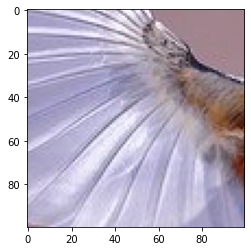

In [3]:
plt.imshow(img[100:200,100:200,::-1])   

In [11]:
help(cv2.rectangle)

Help on built-in function rectangle:

rectangle(...)
    rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a simple, thick, or filled up-right rectangle.
    .   
    .   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
    .   are pt1 and pt2.
    .   
    .   @param img Image.
    .   @param pt1 Vertex of the rectangle.
    .   @param pt2 Vertex of the rectangle opposite to pt1 .
    .   @param color Rectangle color or brightness (grayscale image).
    .   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
    .   mean that the function has to draw a filled rectangle.
    .   @param lineType Type of the line. See #LineTypes
    .   @param shift Number of fractional bits in the point coordinates.
    
    
    
    rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
    .   @overload
    .   
    .   use `rec` parameter as alterna

In [4]:
img_new = cv2.rectangle(img, (100, 200), (450,250), (255,255,255))  

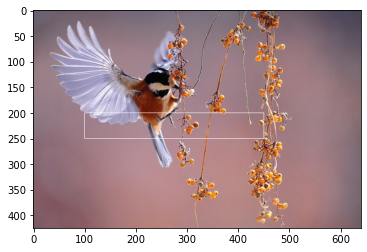

In [5]:
plt.imshow(img_new[:,:,::-1])  ## box가 계속 겹쳐지므로 copy본에 하는 것이 좋다

## 문제 1.

예제 8의 프로그램을 다음과 같이 수정하라.

1. 'Image' 윈도우에서 마우스 왼쪽 버튼을 클릭하면 그 위치가 하얀색 창의 왼쪽 위 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

2. 'Image' 윈도우에서 마우스 오른쪽 버튼을 클릭하면 그 위치가 하얀색 창의 오른쪽 아래 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

3. 'Cropped' 윈도우에서 왼쪽 마우스 버튼을 클릭하면 사용자에게 저장할 파일 이름을 입력받아서 'Cropped' 윈도우에 표시된 영상 부분을 별도의 파일로 저장한다.

In [ ]:
def onMouse01(event, x, y, flags, param):
    global x1, x2, y1, y2, img_cut
    if event == cv2.EVENT_LBUTTONUP:   # x1, y1에 왼쪽 마우스 버튼을 클릭한 위치정보 저장
        if (x2, y2) == (-1, -1):
            x1, y1 = x, y
        else:
            x1, y1 = x, y
            img_new = cv2.rectangle(img.copy(), (x, y), (x2, y2), (255,255,255), cv2.LINE_4)
            img_cut = img[y1:y2, x1:x2,:]
            cv2.imshow(winName01, img_new)
            cv2.imshow(winName02, img_cut)
            
    elif event == cv2.EVENT_RBUTTONUP:    # x2, y2에 오른쪽 마우스 버튼을 클릭한 위치정보 저장
        if (x1, y1) == (-1, -1):
            x2, y2 = x, y
        else:
            x2, y2 = x, y
            img_new = cv2.rectangle(img.copy(), (x1, y1), (x, y), (255,255,255), cv2.LINE_4)
            img_cut = img[y1:y2, x1:x2,:]
            cv2.imshow(winName01, img_new)
            cv2.imshow(winName02, img_cut)

def onMouse02(event, x, y, flags, param):     # 'Cropped' 윈도우에 표시된 영상 저장
    if event == cv2.EVENT_LBUTTONUP:
        new_file_name = input('파일 이름을 입력하세요: ')
        cv2.imwrite(new_file_name, img_cut)
    
file_name = 'bird.png'
img = cv2.imread(file_name)

winName01 = 'Image'
winName02 = 'Cropped'
cv2.imshow(winName01, img)
cv2.namedWindow(winName02, cv2.WINDOW_GUI_NORMAL)

x1, x2 = -1, -1
y1, y2 = -1, -1

cv2.setMouseCallback(winName01, onMouse01)
cv2.setMouseCallback(winName02, onMouse02)


while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()